In [125]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Subset
from torch.optim import SGD

from sklearn.model_selection import train_test_split

import numpy as np
from numpy import dot
import matplotlib.pyplot as plt

In [126]:
hidden_units=50

In [127]:
# Fully connected neural network
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.input_layer = nn.Linear(1, hidden_units)
        self.hidden_layer1 = nn.Linear(hidden_units,hidden_units) 
        self.hidden_layer2 = nn.Linear(hidden_units,hidden_units)
        self.output_layer = nn.Linear(hidden_units, 1)  
    
    def forward(self, x):
        x = self.input_layer(x)
        x_1 = x.relu()
        x_1 = self.hidden_layer1(x_1)
        x_2 = x_1.relu()
        x_2 = self.hidden_layer2(x_2)
        x_3 = x_2.relu()
        x_4 = self.output_layer(x_3)
        return x_1[0],x_2[0],x_3[0],x_4
    
def ReLU_glorot_init(model):
    for name, param in model.named_parameters():
        
        if name.endswith(".bias"):
            param.data.fill_(0)
        else:
            nn.init.xavier_normal_(param)

def next_batch(inputs, targets, batchSize):
	for i in range(0, inputs.shape[0], batchSize):
		yield (inputs[i:i + batchSize], targets[i:i + batchSize])

In [128]:
num_epochs = 100
batch_size = 5
learning_rate = 0.01

In [129]:
X=np.linspace(0,2,100)
y=(X-1)**2+0.5

X=torch.from_numpy(X).float()
y=torch.from_numpy(y).float()

In [130]:
model = NeuralNet()
ReLU_glorot_init(model)

criterion = nn.MSELoss()
optimizer = SGD(model.parameters(), lr=learning_rate)

def train_epoch():
    for xs, ys in next_batch(X,y,batch_size):
        outputs = model(torch.reshape(xs,(batch_size,1)))[-1]
        loss = criterion(outputs, ys)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    return loss.item()

for epoch in range(num_epochs):
    l=train_epoch()
    print('Epoch {}: Loss {:.3f}'.format(epoch+1,l))

Epoch 1: Loss 0.533
Epoch 2: Loss 0.229
Epoch 3: Loss 0.184
Epoch 4: Loss 0.180
Epoch 5: Loss 0.184
Epoch 6: Loss 0.189
Epoch 7: Loss 0.194
Epoch 8: Loss 0.198
Epoch 9: Loss 0.203
Epoch 10: Loss 0.206
Epoch 11: Loss 0.210
Epoch 12: Loss 0.213
Epoch 13: Loss 0.216
Epoch 14: Loss 0.219
Epoch 15: Loss 0.222
Epoch 16: Loss 0.225
Epoch 17: Loss 0.227
Epoch 18: Loss 0.229
Epoch 19: Loss 0.231
Epoch 20: Loss 0.233
Epoch 21: Loss 0.235
Epoch 22: Loss 0.236
Epoch 23: Loss 0.238
Epoch 24: Loss 0.239
Epoch 25: Loss 0.240
Epoch 26: Loss 0.241
Epoch 27: Loss 0.242
Epoch 28: Loss 0.243
Epoch 29: Loss 0.243
Epoch 30: Loss 0.244
Epoch 31: Loss 0.244
Epoch 32: Loss 0.244
Epoch 33: Loss 0.245
Epoch 34: Loss 0.245
Epoch 35: Loss 0.245
Epoch 36: Loss 0.245
Epoch 37: Loss 0.245
Epoch 38: Loss 0.245
Epoch 39: Loss 0.245
Epoch 40: Loss 0.244
Epoch 41: Loss 0.244
Epoch 42: Loss 0.244
Epoch 43: Loss 0.243
Epoch 44: Loss 0.243
Epoch 45: Loss 0.242
Epoch 46: Loss 0.242
Epoch 47: Loss 0.241
Epoch 48: Loss 0.240
E

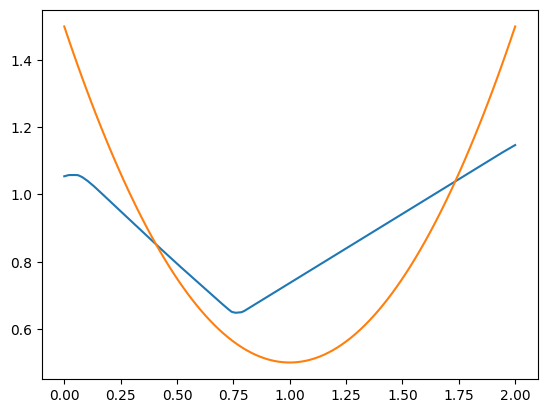

In [131]:
plot_X=np.linspace(0,2,500)
plot_X_torch=torch.from_numpy(plot_X).float()
plt.plot(plot_X,model(torch.reshape(plot_X_torch,(500,1)))[-1].detach().numpy())
plt.plot(X,y)